In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt

import sklearn

print(sklearn.__version__)

from preamble import *

import mglearn

1.0.2


## Generalization, Overfitting, and Underfitting

Relation of Model Complexity to ~~Dataset Size~~ Accuracy.

![model_complexity](https://github.com/amueller/introduction_to_ml_with_python/blob/master/images/overfitting_underfitting_cartoon.png?raw=true)

## FYI: [Chapter 2 - Datasets and kNN](https://elvinouyang.github.io/study%20notes/python-datasets-and-knn/)

<br>

### [Make Forge](https://github.com/amueller/mglearn/blob/master/mglearn/datasets.py#L12)

"a carefully hand-designed dataset lol"

In [2]:
# Use the textbook package to create a sample data set
X, y = mglearn.datasets.make_forge()

print(f"\nX[0]: {X[0]}, y[0]: {y[0]}")



X[0]: [9.963 4.597], y[0]: 1


### Listed Colormap

```py
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])
```



X.shape: (26, 2)


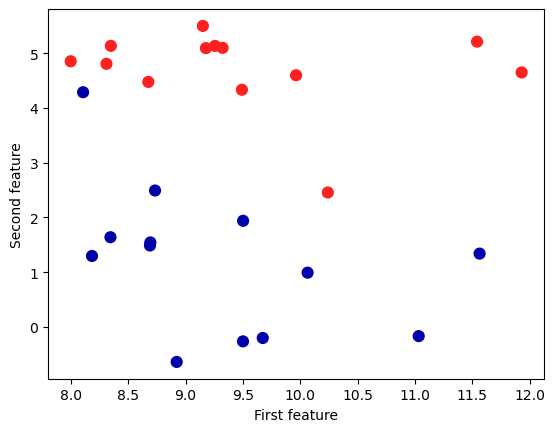

In [3]:
# scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)

plt.xlabel("First feature")
plt.ylabel("Second feature")

print(f"\nX.shape: {X.shape}")  # 26 samples (or "data points"), with 2 features.


### [Discrete scatter plot](https://github.com/amueller/mglearn/blob/106cf48ef03710ef1402813997746741aa6467da/mglearn/plot_helpers.py#L27)


X.shape: (26, 2)


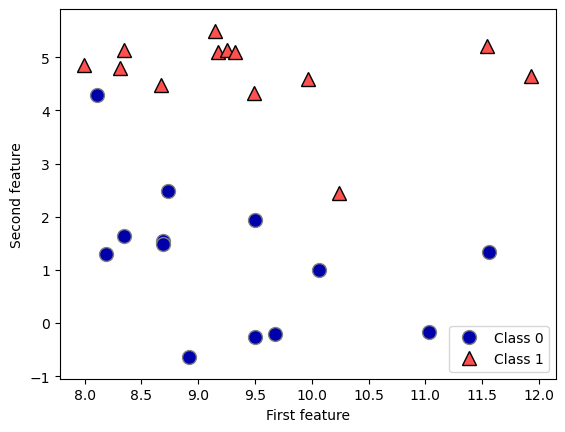

In [4]:
# Discrete scatter plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

print("\nX.shape:", X.shape)

### [Make wave](https://github.com/amueller/mglearn/blob/master/mglearn/datasets.py#L22)

Text(0, 0.5, 'Target')

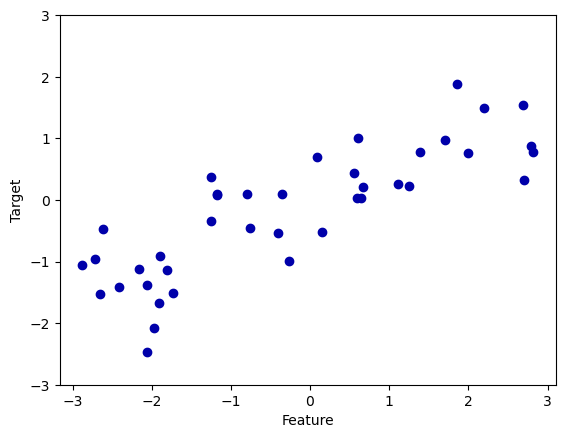

In [5]:
# Make wave
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


(-3.1, 3.1)

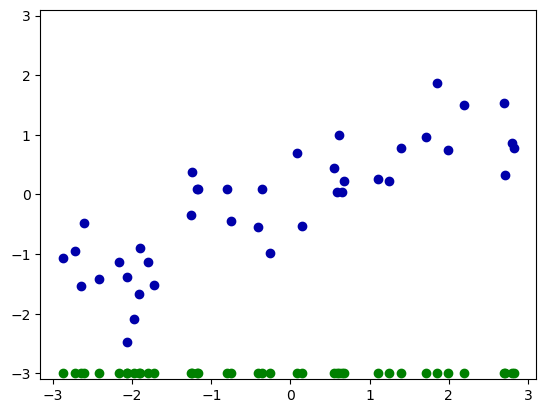

In [6]:
# Show single feature on the x-axis, with the data points as red dots
# For each data point, the target output is plotted in green on the y-axis
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')  # Blue

# plt.plot(X, -3 * np.ones(len(X)), 'o')  # How is this red?

# https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(X, -3 * np.ones(len(X)), 'go')  # Green

plt.ylim(-3.1, 3.1)


In [7]:
# Wisconsin breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("\nKeys: ", cancer.keys())



Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
# Dataset consists of 569 data points, with 30 features each
print("\nShape:", cancer.data.shape)


Shape: (569, 30)


In [9]:
# Of these 569 data points, 212 are labeled as malignant, and 357 as benign
print("\nSample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})


Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [10]:
# Get a description of the semantic meaning of each feature
print("\nFeature names:\n", cancer.feature_names)


Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
# Read the DESCR attribute of the cancer dataset
print(cancer['DESCR'][:193], "\n")


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number  



In [12]:
# Boston Housing dataset

# predict the median value of homes in Boston neighborhoods in the 1970s
# Info = crime rate, proximity to the Charles River, highway accessibility, etc

from sklearn.datasets import load_boston
boston = load_boston()

# 506 data points, described by 13 features
print("\nShape:", boston.data.shape)


Shape: (506, 13)


In [13]:
# Read the DESCR attribute of Boston
print(boston['DESCR'][:193], "\n")


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical  



In [14]:
X, y = mglearn.datasets.load_extended_boston()
print("\nX.shape:", X.shape)


X.shape: (506, 104)


In [15]:
# DERIVED DATASET / FEATURE ENGINEERING

# crime rate + highway accessibility, and also crime rate * highway accessibility.

print("\nShape:", X.shape)


Shape: (506, 104)


The resulting 104 features are the 13 original features together with the ~~91~~ possible combinations of 2 features within those 13.

Note: The number of ways to pick 2 elements out of 13 elements = 91. <span style="color:red;">&lt;&ndash; No, it's not.</span>

This is called the binomial coefficient, which is the number of combinations of k elements that can be selected from a set of n elements. 

Often this is written as nk, and spoken as "n choose k"—in this case, **13 choose 2.**


In [16]:
import math

# Calculate binomial coefficient of 13 choose 2
n = 13
k = 2

coef = math.comb(n, k)

coef

78

Huh...

In [17]:
# Try it using scipy...
from scipy.special import comb

n = 13
k = 2
coef = comb(n, k)

coef

78.0

The `math.comb()` method in Python is used to get the number of ways to choose k items from n items without repetition and without order.

It basically evaluates to `n! / (k! * (n – k)!)` when k n.

It is also known as **binomial coefficient** because it is equivalent to the coefficient of k-th term in polynomial expansion of the expression `(1 + x)n`.

Syntax: `math.comb(n, k)`